In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


##                                  ***Hotel booking***

## Workflow :

* Understanding the data
* Data Cleaning
* Exploratory Data Analysis
* Insights

## Importing libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [3]:
df=pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")

## Viewing Data

In [4]:
df.head().iloc[:,15:]

,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## ***Column Discription***

- Hotel (H1 = Resort Hotel or H2 = City Hotel)
- is_canceled = Value indicating if the booking was canceled (1) or not (0)
- lead_time = Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year = Year of arrival date
- arrival_date_month = Month of arrival date
- arrival_date_week_number = Week number of year for arrival date
- arrival_date_day_of_month = Day of arrival date
- stays_in_weekend_nights = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hote
- stays_in_week_nights = Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- adults = Number of adults
- children = Number of children
- babies = Number of babies
- meal = Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal
- country = Country of origin. Categories are represented in the ISO 3155–3:2013 formal
- market_segment = Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- distribution_channel = Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- is_repeated_guest = Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations = Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_bookings_not_canceled = Number of previous bookings not cancelled by the customer prior to the current booking
- reserved_room_type = Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- assigned_room_type = Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due
- booking_changes = Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
- deposit_type = Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories
- agent = ID of the travel agency that made the booking
- company = ID of the company/entity that made the booking or responsible for paying the booking.
- days_in_waiting_list = Number of days the booking was in the waiting list before it was confirmed to the custome
- customer_type = Type of booking, assuming one of four categories
- adr = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car_parking_spaces = Number of car parking spaces required by the customer
- total_of_special_requests = Number of special requests made by the customer (e.g. twin bed or high floor)
- reservation_status = Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out
- reservation_status_date = Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus 

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
53063,City Hotel,1,188,2016,June,25,15,0,2,1,...,Non Refund,119.0,NaN,39,Transient,130.00,0,0,Canceled,2016-01-18
111419,City Hotel,0,52,2017,May,18,6,2,3,2,...,No Deposit,7.0,NaN,0,Transient,121.68,0,0,Check-Out,2017-05-11
19449,Resort Hotel,0,0,2015,December,51,19,0,1,2,...,No Deposit,NaN,NaN,0,Transient,43.00,0,0,Check-Out,2015-12-20
98189,City Hotel,0,27,2016,September,39,23,1,2,2,...,No Deposit,7.0,NaN,0,Transient,234.35,0,1,Check-Out,2016-09-26
67140,City Hotel,1,10,2017,April,17,29,0,1,2,...,No Deposit,9.0,NaN,0,Transient,190.00,0,2,Canceled,2017-04-21
11483,Resort Hotel,1,140,2017,May,19,10,2,5,1,...,No Deposit,96.0,NaN,0,Transient-Party,48.00,0,0,Canceled,2017-01-12
31428,Resort Hotel,0,163,2016,December,52,24,2,3,2,...,No Deposit,339.0,NaN,0,Transient,86.24,0,1,Check-Out,2016-12-29
83491,City Hotel,0,9,2016,February,6,3,0,2,1,...,No Deposit,NaN,NaN,0,Transient,67.00,0,0,Check-Out,2016-02-05
111616,City Hotel,0,104,2017,May,19,9,0,4,2,...,No Deposit,28.0,NaN,0,Transient,85.00,0,2,Check-Out,2017-05-13
84268,City Hotel,0,2,2016,February,8,17,1,4,2,...,No Deposit,28.0,NaN,0,Transient,70.00,0,0,Check-Out,2016-02-22


## Checking the shape of data

In [8]:
df.shape


(119390, 32)

## Basic Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Checking the missing value

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Checking the missing value %

In [11]:
for i in df.columns:
    if df[i].isnull().any():
        print(i,"---------------",df[i].isnull().sum()/df.shape[0]*100,"%")

children --------------- 0.003350364352123293 %
country --------------- 0.40874445095904177 %
agent --------------- 13.686238378423655 %
company --------------- 94.30689337465449 %


## Droping the company column because it has 94% nan values

In [12]:
df.drop(columns=["company"],inplace=True)

# Imputation

## Checking dtype

In [13]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Droping the raws which have null valuse in country

In [14]:
df.dropna(how="any",axis=0,inplace=True)

## Filling the null values

In [15]:
for i in df.columns:
    if df[i].isnull().any():
        if df[i].dtypes=="object":
            df[i].fillna(df[i].mode()[0],inplace=True)
        elif  df[i].dtypes=="float":
            df[i].fillna(df[i].median(),inplace=True)
        elif  df[i].dtypes=="int":
            df[i].fillna(df[i].median(),inplace=True)
        else:
            pass

In [16]:
df.isnull().sum().sum()

0

## Statistical summary of the data

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,102894.0,0.390314,0.487823,0.00,0.0,0.0,1.0,1.0
lead_time,102894.0,111.740092,107.681013,0.00,26.0,79.0,169.0,629.0
arrival_date_year,102894.0,2016.156977,0.706117,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,102894.0,27.339155,13.279990,1.00,17.0,28.0,38.0,53.0
arrival_date_day_of_month,102894.0,15.786771,8.794042,1.00,8.0,16.0,24.0,31.0
stays_in_weekend_nights,102894.0,0.978181,1.003991,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,102894.0,2.589655,1.905941,0.00,1.0,2.0,3.0,41.0
adults,102894.0,1.899926,0.490891,0.00,2.0,2.0,2.0,26.0
children,102894.0,0.111231,0.411982,0.00,0.0,0.0,0.0,10.0
babies,102894.0,0.007697,0.097089,0.00,0.0,0.0,0.0,10.0


## How is the correlation between columns ?

In [18]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.277666,0.004561,0.004172,-0.005468,-0.023589,0.003918,0.037057,0.005409,-0.032038,-0.029913,0.117983,-0.042589,-0.131714,-0.081939,0.052475,0.023284,-0.188298,-0.257934
lead_time,0.277666,1.000000,0.041082,0.120155,-0.003472,0.047674,0.124195,0.072477,-0.049796,-0.021975,-0.055432,0.100271,-0.045082,-0.000282,-0.068753,0.170352,-0.112652,-0.111226,-0.123047
arrival_date_year,0.004561,0.041082,1.000000,-0.530387,0.005206,0.020693,0.032807,0.061359,0.065394,-0.009828,-0.022428,-0.134031,0.015334,0.036468,0.063684,-0.061742,0.222059,-0.012864,0.121490
arrival_date_week_number,0.004172,0.120155,-0.530387,1.000000,0.057587,0.010114,0.013212,0.003496,-0.000687,0.007865,-0.013250,0.042645,-0.025095,0.008551,-0.030993,0.023822,0.062570,-0.001477,0.021639
arrival_date_day_of_month,-0.005468,-0.003472,0.005206,0.057587,1.000000,-0.016510,-0.030852,0.001151,0.013545,-0.002426,-0.008447,-0.024869,0.001447,0.011505,0.001731,0.024778,0.025590,0.004745,0.002560
stays_in_weekend_nights,-0.023589,0.047674,0.020693,0.010114,-0.016510,1.000000,0.486350,0.070997,0.039961,0.020068,-0.056987,-0.003021,-0.028041,0.054693,0.141387,-0.064610,0.016233,-0.011037,0.056110
stays_in_week_nights,0.003918,0.124195,0.032807,0.013212,-0.030852,0.486350,1.000000,0.071890,0.039922,0.021008,-0.057415,-0.013591,-0.029082,0.081598,0.183281,-0.009330,0.036263,-0.016376,0.050318
adults,0.037057,0.072477,0.061359,0.003496,0.001151,0.070997,0.071890,1.000000,0.014385,0.013307,-0.073802,-0.003366,-0.054299,-0.051995,-0.034489,-0.022945,0.237099,0.036907,0.116793
children,0.005409,-0.049796,0.065394,-0.000687,0.013545,0.039961,0.039922,0.014385,1.000000,0.016742,-0.018975,-0.025070,-0.009899,0.055324,0.041242,-0.036455,0.335729,0.065531,0.068130
babies,-0.032038,-0.021975,-0.009828,0.007865,-0.002426,0.020068,0.021008,0.013307,0.016742,1.000000,-0.006906,-0.007150,-0.002595,0.094213,0.036338,-0.010894,0.025584,0.039087,0.091729


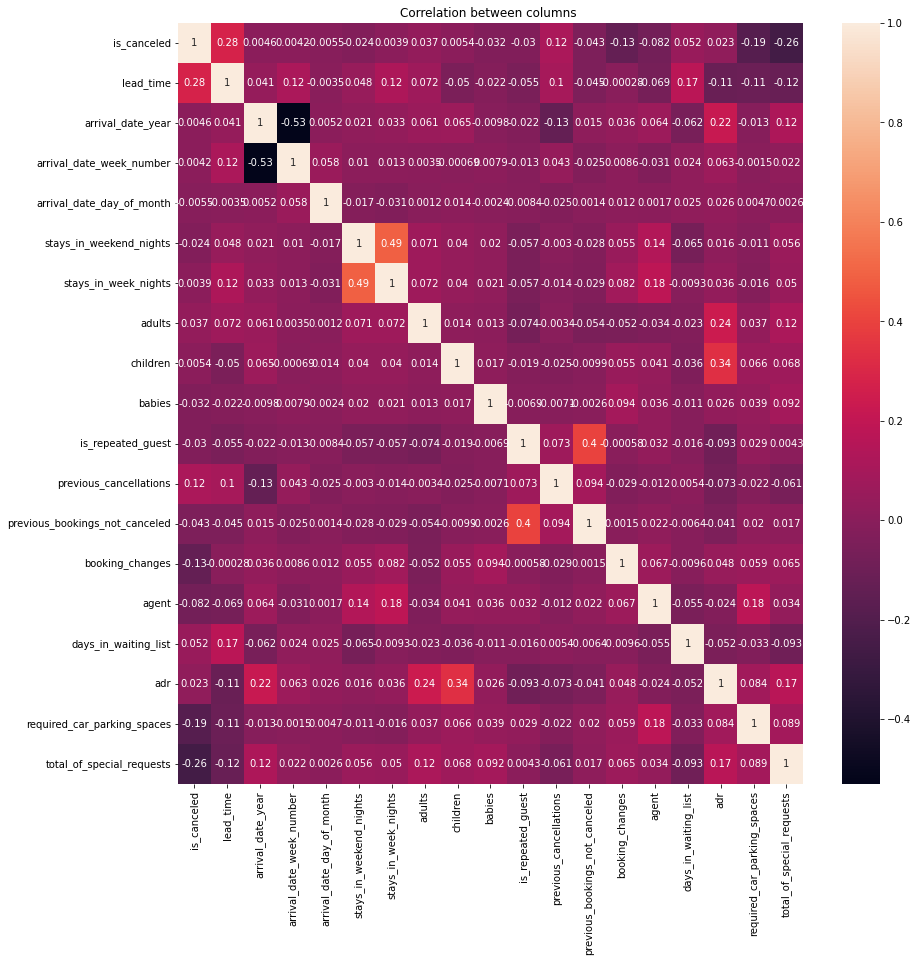

In [19]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between columns ")
plt.show()

## Exploratory Data Analysis

## Univariate analysis

We will start by visualizing the cancellation rate, which is the proportion of bookings that were ultimately canceled.

# EDA

## Hotel Column

## Distribution of hotel on the basis of there categories

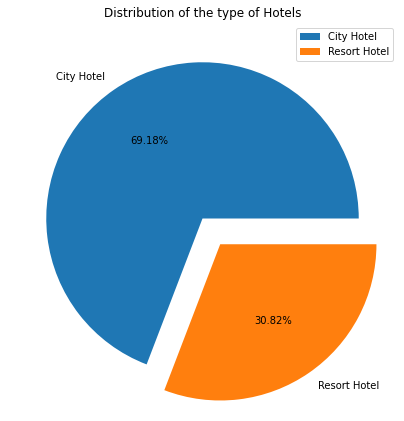

In [20]:
plt.figure(figsize=(7,8))
plt.pie(df.hotel.value_counts().values,explode=[0,0.2],labels=df.hotel.value_counts().index,autopct='%.2f%%')
plt.legend()
plt.title('Distribution of the type of Hotels')
plt.show()

From this graph we can see that City Hotel has more booking than Resort Hotel

## What are the comman arival dates 

In [21]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

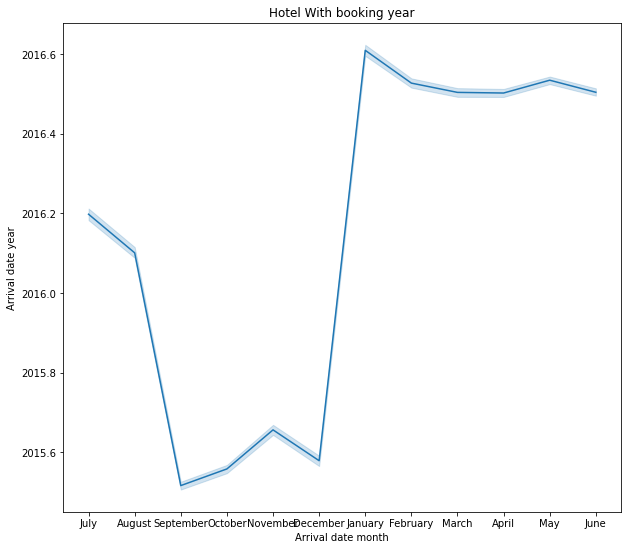

In [22]:
plt.figure(figsize=(10,9))
sns.lineplot(data=df,x='arrival_date_month',y='arrival_date_year')
plt.xlabel('Arrival date month')
plt.ylabel('Arrival date year')
plt.title('Hotel With booking year')
plt.show()

- Peak point on January
- And the Continue to feb to june

## Canceled Booking 

## How many booking got cancelled ?

In [23]:
df["is_canceled"].unique()

array([0, 1])

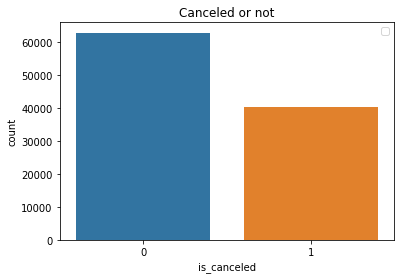

In [24]:
plt.legend()
sns.countplot(df["is_canceled"])
plt.title("Canceled or not")
plt.show()

## Or pie chart tells the distribution

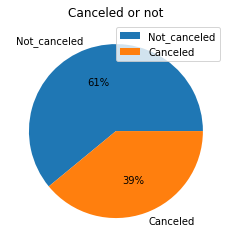

In [25]:
l1=["Not_canceled","Canceled"]
l=list(df["is_canceled"].value_counts())
l
plt.pie(l,labels=l1,autopct="%0.0f%%");
plt.legend()
plt.title("Canceled or not")
plt.show()

- Almost 40 % of booking get canceled

## Deposit Type

## Which type of booking (deposit type) is prefered ?

In [26]:
df["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

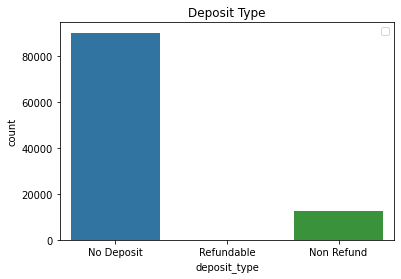

In [27]:
sns.countplot(df["deposit_type"])
plt.legend()
plt.title("Deposit Type")
plt.show()

- According to the data the deposit type is no deposit.
- And Refundable is not visible in the graph so it's almost 0

## Customer Type

Popular types of hotel distribution channels:

1. Direct website bookings 
2. Direct phone bookings 
3. Online travel agencies (OTAs) 
4. Global distribution systems 
5. Metasearch sites 

## Which kind of customer are there ?

In [28]:
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

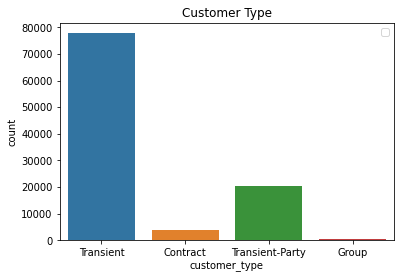

In [29]:
sns.countplot(df["customer_type"])
plt.legend()
plt.title("Customer Type")
plt.show()

## ***Distribution***

In [30]:
(df["distribution_channel"])

3         Corporate
4             TA/TO
5             TA/TO
7            Direct
8             TA/TO
            ...    
119385        TA/TO
119386        TA/TO
119387        TA/TO
119388        TA/TO
119389        TA/TO
Name: distribution_channel, Length: 102894, dtype: object

## **Which distribution have maximum values ?**

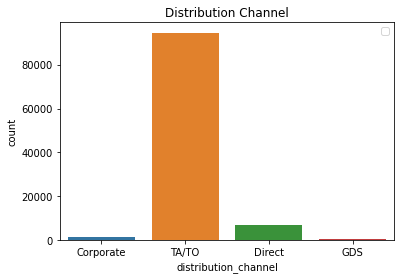

In [31]:
sns.countplot(df["distribution_channel"])
plt.legend()
plt.title("Distribution Channel")
plt.show()

- TA/TO distribution channel is mostly used
- GDS is less used 

## Reserve room type

In [32]:
df["reserved_room_type"].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'B'], dtype=object)

## Which type of room is reserved ?

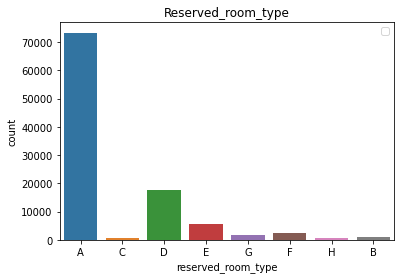

In [33]:
sns.countplot(df["reserved_room_type"])
plt.legend()
plt.title("Reserved_room_type")
plt.show()

- We can see that mostly A type of room get reserved
- and L and P type of room not get booked

## Lead time

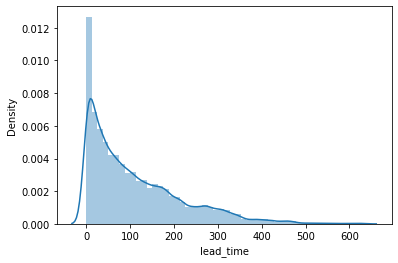

In [34]:
sns.distplot(df["lead_time"])
plt.show()

We can see most of the leading time is between 0-200

## Bivareante Analysis

## *Arrival date year and hotel*

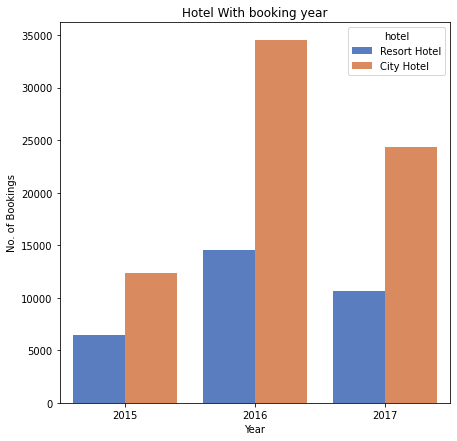

In [35]:
plt.figure(figsize=(7,7))
sns.countplot(x='arrival_date_year',data=df,hue='hotel',palette="muted")
plt.xlabel('Year')
plt.ylabel('No. of Bookings')
plt.title('Hotel With booking year')
plt.show()

## *How many hotel room canceled after booking ?*

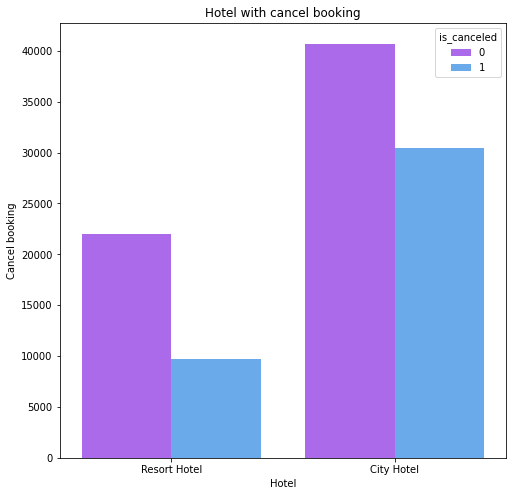

In [36]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='hotel',hue='is_canceled',palette="cool_r")
plt.xlabel('Hotel')
plt.ylabel('Cancel booking')
plt.title("Hotel with cancel booking")
plt.show()

## *How many booking cancel with respect to spl requests ?*

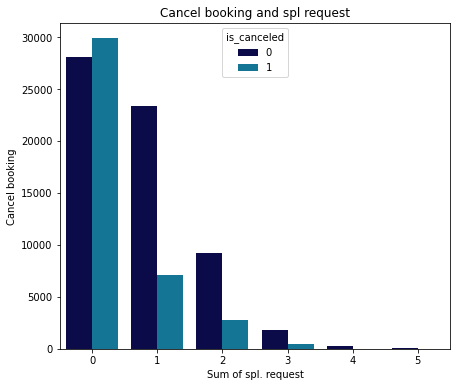

In [37]:
plt.figure(figsize=(7,6))
sns.countplot(data=df,x='total_of_special_requests',hue='is_canceled',palette="ocean")
plt.xlabel('Sum of spl. request')
plt.ylabel('Cancel booking')
plt.title('Cancel booking and spl request')
plt.show()

## *How many booking got cancelled with respect to deposit type ?*

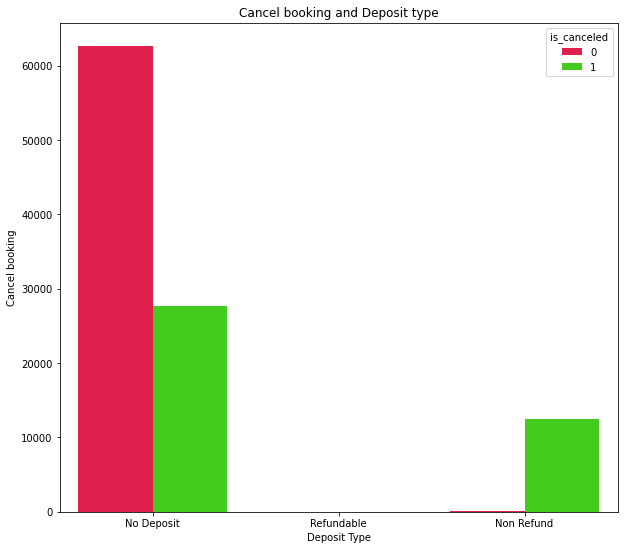

In [38]:
plt.figure(figsize=(10,9))
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled',palette= 'prism_r')
plt.xlabel('Deposit Type')
plt.ylabel('Cancel booking')
plt.title('Cancel booking and Deposit type')
plt.show()

In [39]:
df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

## *Which kind of meal provide in the hotel ?*

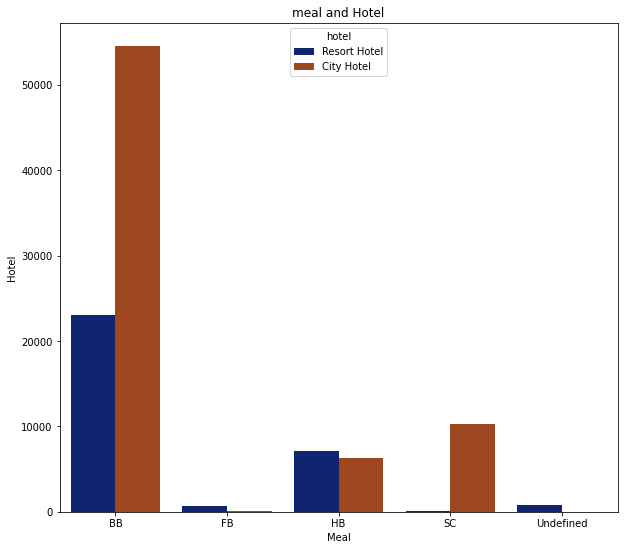

In [40]:
plt.figure(figsize=(10,9))
sns.countplot(x = 'meal', data = df, hue = 'hotel',palette= 'dark')
plt.xlabel('Meal')
plt.ylabel("Hotel")
plt.title('meal and Hotel')
plt.show()

## *Which kind of marget segment with the cancelled booking ?*

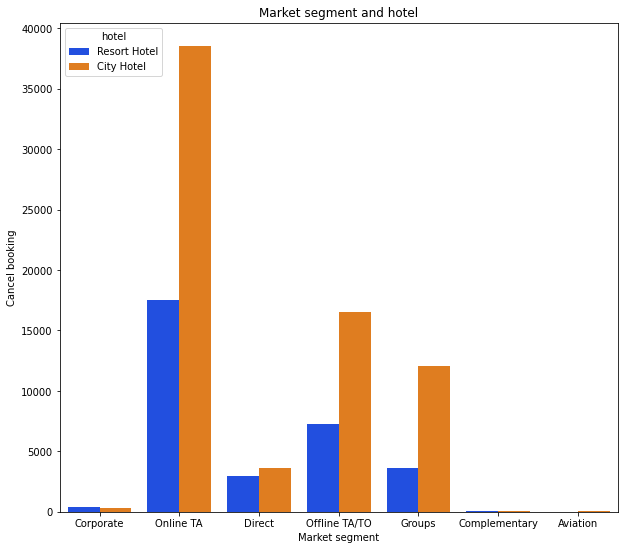

In [41]:
plt.figure(figsize=(10,9))
sns.countplot(x = 'market_segment', data = df, hue = 'hotel',palette= 'bright')
plt.xlabel('Market segment')
plt.ylabel('Cancel booking')
plt.title('Market segment and hotel')
plt.show()

## Which hotel have the disributon channel ?

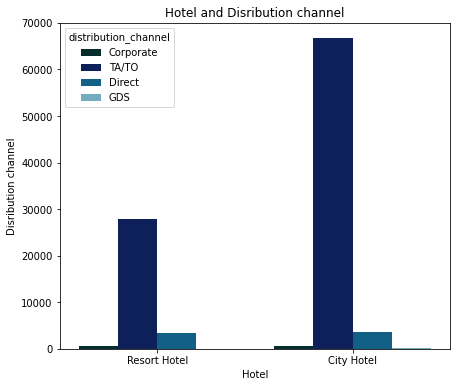

In [42]:
plt.figure(figsize=(7,6))
sns.countplot(data=df,x='hotel',hue='distribution_channel',palette="ocean")
plt.xlabel('Hotel')
plt.ylabel('Disribution channel')
plt.title('Hotel and Disribution channel')
plt.show()

## What kind of room is assigned coresponding with hotel type ?


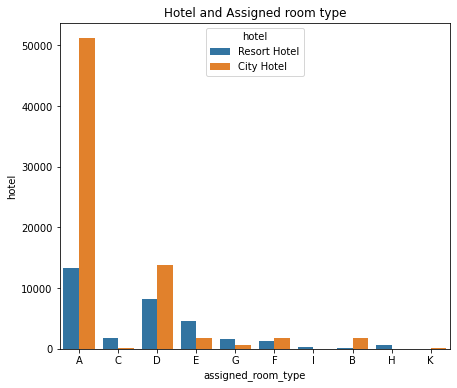

In [43]:
plt.figure(figsize=(7,6))
sns.countplot(data=df,x='assigned_room_type',hue='hotel')
plt.xlabel('assigned_room_type')
plt.ylabel('hotel')
plt.title('Hotel and Assigned room type')
plt.show()

___
---